# Plot Temperature

<h1> Near surface air temperature change in the CESM2 large ensemble</h1>

<h2> In this notebook you'll read in data from 50 members of the CESM2 large ensemble and explore the climate change response and the uncertainty due to natural internal variability in the annual mean near surface air temperature (variable TREFHT) </h2>

<h3><font color='red'>Cell 1</font></h3>

In [1]:
# Execute this cell to load the functions necessary for the computations
from functions import *
import xarray as xr
import matplotlib.pyplot as plt
from math import nan
import warnings
warnings.filterwarnings('ignore')

<h2>Let's start by looking at global mean surface temperature</h2>

<h3>Execute the cell below to read in the data</h3>

<h3><font color='red'>Cell 2</font></h3>

In [2]:
# Model ensemble
trefht = xr.open_dataset("/scratch/data/DATA4LENS2/output_lens2_am/TREFHT/TREFHT_am_LENS2_second50.nc")

# Observations
obs = xr.open_dataset("/scratch/data/DATA4LENS2/output_obs/OBS_tas.nc")

<h3>Execute the cell below to calculate the global average (this will take a few seconds)</h3>

<h3><font color='red'>Cell 3</font></h3>

In [3]:
trefht_ga = calc_global_avg(trefht.TREFHT)
obs_ga = calc_global_avg(obs.tas)

<h2>Execute the cell below to make a graph of global mean temperature anomalies (relative to the 1980-2000 average) for each of the individual model members, the average across all members, and the observations</h2>

<h3><font color='red'>Cell 4</font></h3>

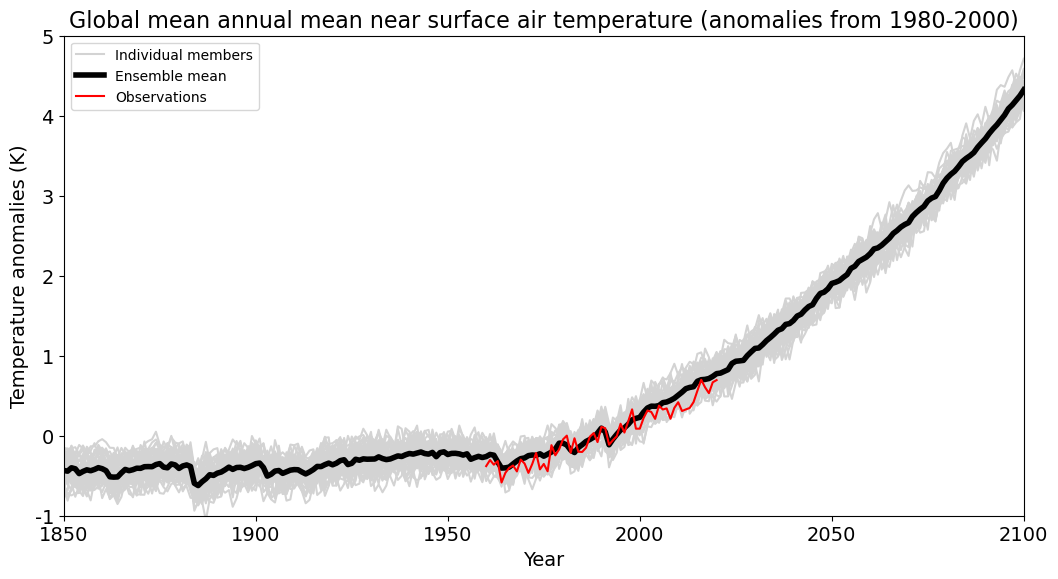

In [4]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.1,0.5,0.6,0.3])
ax.set_xlim(1850,2100)
ax.set_xticks([1850,1900,1950,2000,2050,2100])
ax.set_xticklabels(['1850','1900','1950','2000','2050','2100'], fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylim(-0.5,5)
ax.set_yticks([-1,0,1,2,3,4,5])
ax.set_yticklabels(['-1','0','1','2','3','4','5'], fontsize=14)
ax.set_ylabel('Temperature anomalies (K)', fontsize=14)
ax.set_title('Global mean annual mean near surface air temperature (anomalies from 1980-2000)', fontsize=16)
    
[ax.plot(trefht_ga.year, trefht_ga.isel(M=imem) - trefht_ga.isel(M=imem).sel(year=slice(1980,2000)).mean('year'), 
         color='lightgray', label='Individual members' if imem == 0 else '') for imem in np.arange(0,trefht_ga.M.size,1)];
ax.plot(trefht_ga.year, trefht_ga.mean('M') - trefht_ga.mean('M').sel(year=slice(1980,2000)).mean('year'), color='black', linewidth=4, label='Ensemble mean')
ax.plot(obs_ga.year, obs_ga - obs_ga.sel(year=slice(1980,2000)).mean('year'), color='red', label='Observations')


ax.legend()

<h3>Now let's look at some maps of temperature change.</h3>

<h3>Here you can specify which decade you'd like to look at (choose the start year of the decade) and we'll compare the decadal averaged temperature of that decade relative to the decade of 1980-1990</h3>

<h3>What decade would you like to look at?  The default here is set to the decade starting in 2010.  Change this to another decade that you'd like to look at and then execute the cell</h3>

<h3><font color='red'>Cell 5</font></h3>

You're now going to look at the decade from 2010 to 2019


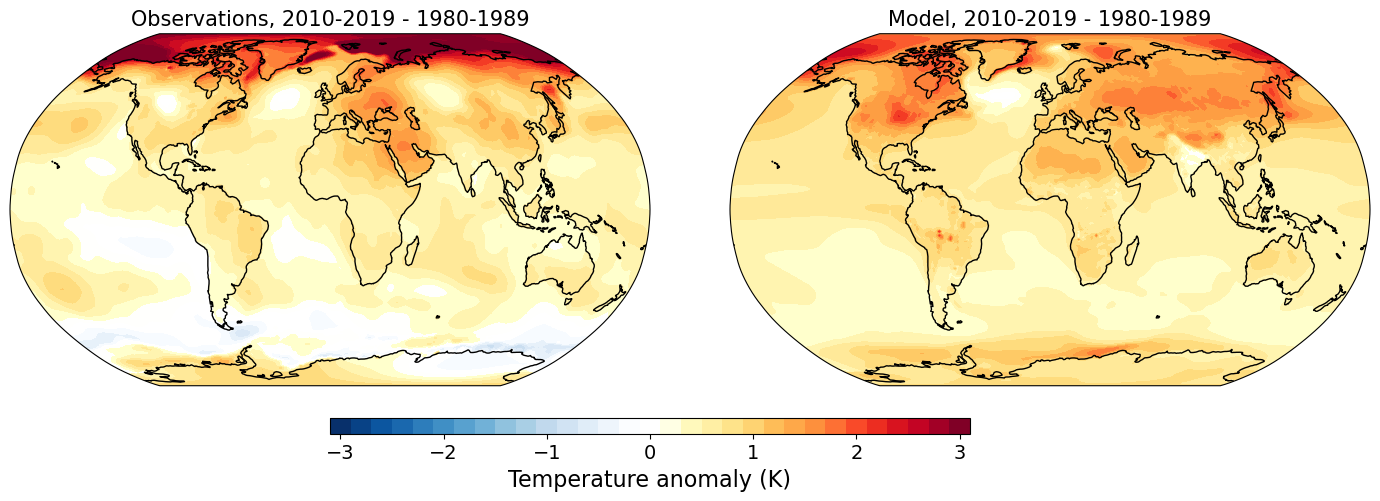

In [5]:
start_year_of_decade = 2010

print("You're now going to look at the decade from "+str(start_year_of_decade)+" to "+str(start_year_of_decade+9))

fig = plt.figure(figsize=(16,16))

fig = plot_tmap_ensemblemean(fig, obs, trefht, start_year_of_decade)

<h3>Now let's look at individual ensemble members.  These are equally valid hypothetical futures (or representations of the past) according to our model.  Below you'll be able to look at 9 members at a time and you can specify which ones you'll look at.  Specify 9 numbers ranging from 1 to 50 in the array in the following cell.  Then execute the cell and you'll see temperature maps for the decade that you've chosen for those 9 members.  Currently members 1 to 9 are being shown.</h3>

<h3><font color='red'>Cell 6</font></h3>

In [ ]:
#members=[1,2,3,4,5,6,7,8,9]

if (len(members) > 9):
    print("!!! This won't work.  Please choose only 9 or fewer members")
    
if (np.max(members) > 50):
    print("!!! This won't work.  You have chosen member "+str(np.max(members))+" which is out of range.  Choose members between 1 and 50")
    
fig = plt.figure(figsize=(16,16))

fig = plot_tmap_members(fig, obs, trefht, start_year_of_decade, members)